The goal is to create a model to predict house prices by given house characteristics. The assignment would be evaluated based on models performance on the test data (which is not included in the attached dataset) and full training flow implementation. Here are a few hints to avoid mistakes and get a better model and a better implementation.

1. Avoid overfitting - check your models on validation/test datasets except training ones.
2. Use cross validation with different algorithms (Linear Regression, Ridge Regression, KNNR etc.) and different params (e.g., KNN with different number of neighbors, Ridge Regression with different alpha/lambda values). The model with best score/metric on validation data is selected as your final model
3. Retrain your selected model with best parameters on your data. Use this as a final predictor for the final function.
4. The best practice would be to save the trained model and submit it with the notebook file. You can read about saving sklearn models here - https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/;
5. However, this is optional for now, and for the final test we can rerun your training process and use trained model for the prediction. If your training time is long, please try to go on with solution described in 4.
6. Keep in mind, that even the initial columns and structure of test dataset would be the same as the train dataset, after your processing the column set can be different (which can appear because of One Hot Encoding) and you should handle this somehow.
7. Please leave some kind of instruction for the TA to run your final function and, if necessary, all your codes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import joblib
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
df = pd.read_csv('houses_train.csv')
df.drop(['region', 'url','Unnamed: 0'], axis=1, inplace=True)
if 'price' in df.columns:
    y=df.pop('price')

stex uremn zut porcelem model@ bardacnel u tesnel motavor inch ardjunq aknkalem, ushadrutyun parametrer@ 3500 hate stex


In [2]:

df_numeric=df.select_dtypes('number')
df_poly=PolynomialFeatures(2).fit_transform(df_numeric)
df_all=np.concatenate([df_poly,df.select_dtypes('object').values],axis=1)
x_train,x_test,y_train,y_test=train_test_split(df_all,y,train_size=0.9)

ohe=OneHotEncoder(handle_unknown='ignore').fit(x_train)
x_train=ohe.transform(x_train)
x_test=ohe.transform(x_test)
print('model parameter ',x_train.shape[1])    
res_test=[]
res_train=[]
for j in range(10):
    model1=Ridge(alpha=j*0.2)   
    model1.fit(x_train,y_train)
    res_train.append(r2_score(y_train,model1.predict(x_train)))  
    res_test.append(r2_score(y_test,model1.predict(x_test)))

model parameter  3395


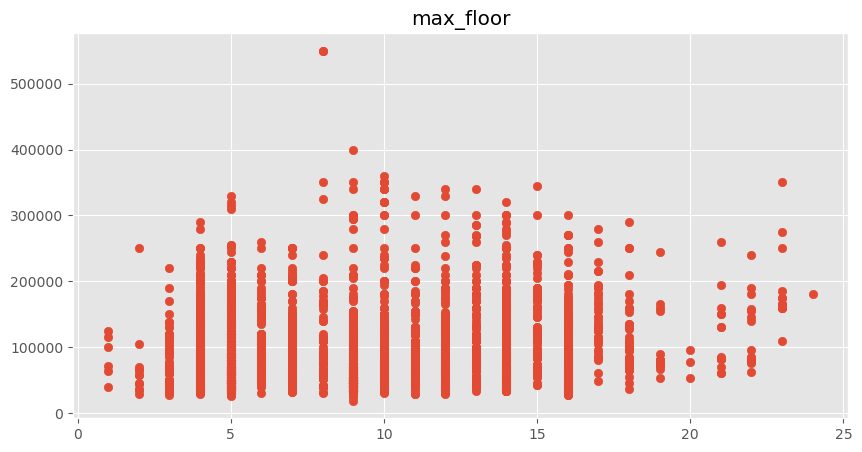

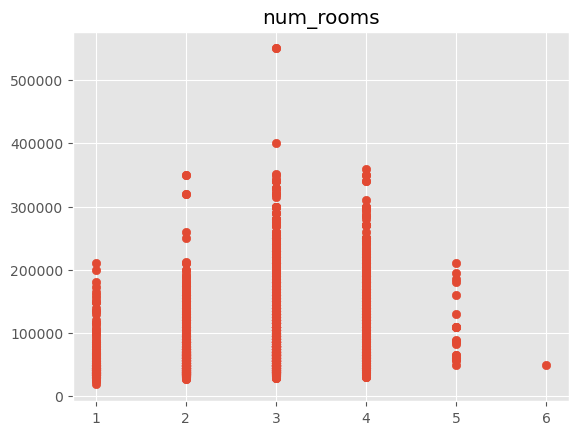

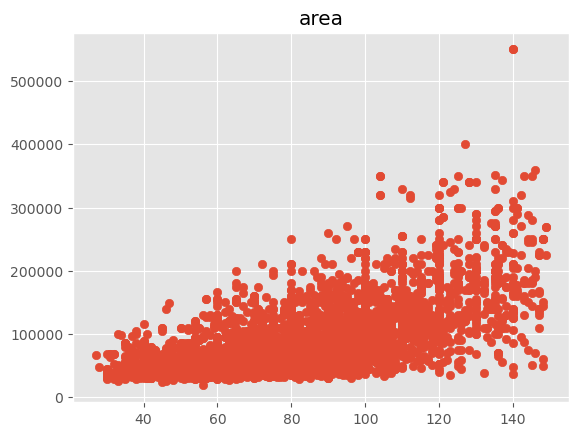

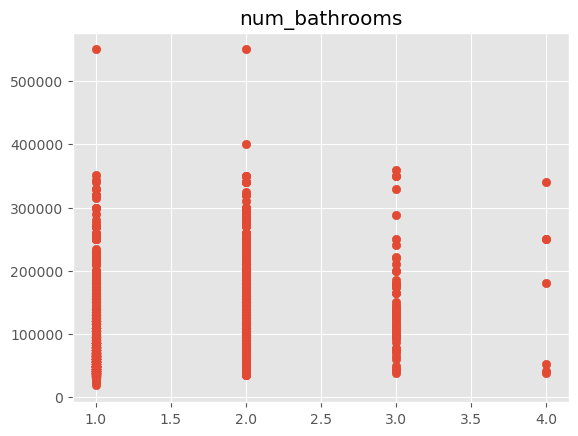

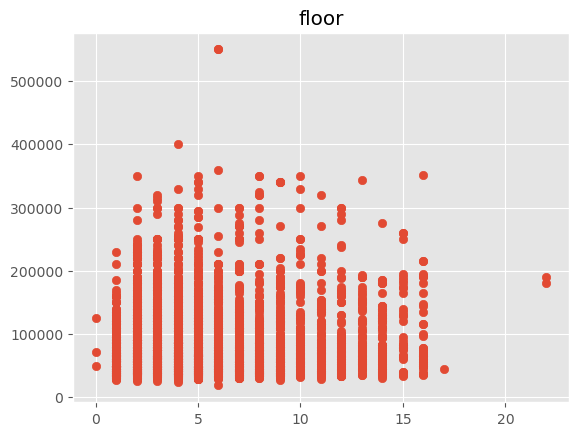

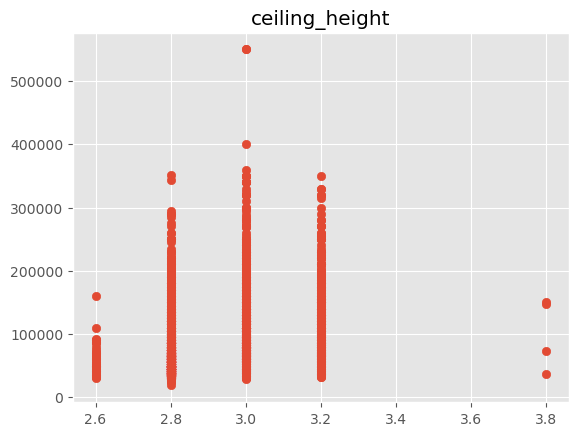

In [3]:
plt.figure(figsize=(10,5))
for i in df_numeric.columns:
    plt.scatter(df_numeric[i],y)
    plt.title(i)
    plt.show()

stex mtacelem menak tvayin  feauturner@, iranc inch or masin one hot encode anem u ardyunq@ amen angam barcr e exel sovorakanic, bayc heto @ndhanur modeli vra porceluc tarberutyun chtvec 

In [4]:
custom=df[['max_floor','num_rooms','num_bathrooms', 'floor', 'ceiling_height','area']].values
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(custom,y,train_size=0.9)
model=LinearRegression()
print(x_train.shape)
model.fit(x_train,y_train)
print(r2_score(y_train,model.predict(x_train)))  
print(r2_score(y_test,model.predict(x_test)))


ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).fit(x_train[:,:-1])
x_train=np.concatenate([x_train[:,-1].reshape(-1,1),ohe.transform(x_train[:,:-1])],axis=1)
model.fit(x_train,y_train)

print(x_train.shape)
x_test=np.concatenate([x_test[:,-1].reshape(-1,1),ohe.transform(x_test[:,:-1])],axis=1)
print(r2_score(y_train,model.predict(x_train)))  
print(r2_score(y_test,model.predict(x_test)))

(4500, 6)
0.4968263468557601
0.5049628095622753
(4500, 59)
0.5469720872492365
0.5320807171316324


In [2]:
df = pd.read_csv('houses_train.csv')
df.drop(['region', 'url','Unnamed: 0'], axis=1, inplace=True)
if 'price' in df.columns:
    y=df.pop('price')

 stex im uzacs ridgecv ov cher linum, stipvac es gri  zut tvyalner@ im uzac dzevov kpoxe u tarber alphanerov kporce 

In [7]:
def model_eval(data,y,k,n,alfa=[0.5,0.5]):
    kf = KFold(n_splits=k,shuffle=True)
    train_res_r2=[]
    train_res_mae=[]
    test_res_mae=[]
    test_res_r2=[]
    for j in alfa:
        for i, (train_index, test_index) in enumerate(kf.split(data)):
            ohec=OneHotEncoder(handle_unknown='ignore',sparse_output=False).fit(data[train_index][:,n:])

            x_train=np.concatenate([data[train_index][:,:n],ohec.transform(data[train_index][:,n:])],axis=1)
            x_test=np.concatenate([data[test_index][:,:n],ohec.transform(data[test_index][:,n:])],axis=1)
            y_train=y[train_index]
            y_test=y[test_index]

            model=Ridge(alpha=j)
            model.fit(x_train,y_train)
            train_res_r2.append(r2_score(y_train,model.predict(x_train)))
            test_res_r2.append(r2_score(y_test,model.predict(x_test)))
            train_res_mae.append(mse(y_train,model.predict(x_train)))
            test_res_mae.append(mse(y_test,model.predict(x_test)))
            result=np.array([train_res_r2,train_res_mae,test_res_r2,test_res_mae])
        print('train r2 ',np.sqrt(np.mean(result[1])))
        print('test r2 ',np.sqrt(np.mean(result[3])))
        print('alpha=',j)
    print(x_train.shape[1],'number of parameters')
    
    
df_obj=df.select_dtypes('object').values
df_num=PolynomialFeatures(degree=2,include_bias=False).fit_transform(df.select_dtypes('number').values)
data=np.concatenate([df_num,df_obj],axis=1)
model_eval(data,y,10,df_num.shape[1])

train r2  21991.387816031103
test r2  23560.68836755147
alpha= 0.5
train r2  21991.43894058371
test r2  23547.792353459972
alpha= 0.5
381 number of parameters
